In [1]:
import requests
import json
import csv
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
import time

In [52]:
lat = "42.0988"
lon = "-75.9206"
genius  = requests.get(f"http://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
forecast = json_file["properties"]["forecast"]

new_request = requests.get(forecast)
json = new_request.json()

json.keys()

data_file = open("forecast_bing.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Day", "Temperature", "Forecast"])

a = json["properties"]["periods"]
for i in a:
    day = i["name"]
    temp = i["temperature"]
    detail = i["detailedForecast"]
       
    csv_writer.writerow([day, temp, detail])
        
data_file.close()

sheet = pd.read_csv("forecast_bing.csv")
#sheet = sheet.sort_values(by="population", ascending=False)
sheet


,Day,Temperature,Forecast
0,Tonight,18,"Mostly clear, with a low around 18. West wind ..."
1,Thursday,50,"Mostly sunny, with a high near 50. Southwest w..."
2,Thursday Night,36,"A chance of rain after 2am. Mostly cloudy, wit..."
3,Friday,51,"A chance of rain before 8am, then rain showers..."
4,Friday Night,30,"Rain showers before 2am. Mostly cloudy, with a..."
5,Saturday,41,A slight chance of rain showers after 2pm. Par...
6,Saturday Night,21,A slight chance of rain showers before 8pm. Mo...
7,Sunday,33,A slight chance of snow showers between 8am an...
8,Sunday Night,21,"Partly cloudy, with a low around 21."
9,Monday,46,"Sunny, with a high near 46."


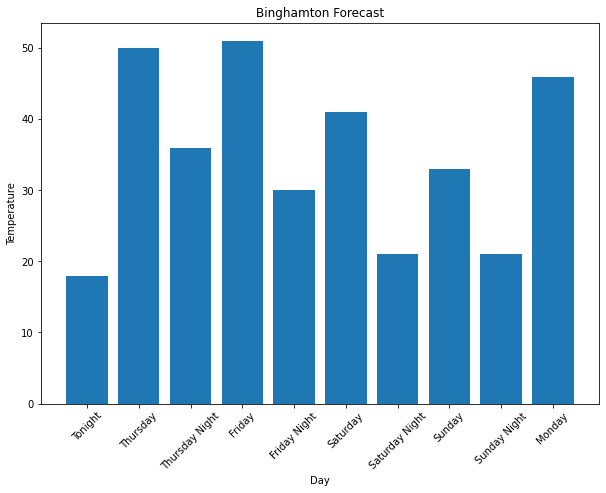

In [38]:
df = pd.DataFrame(sheet)

day = df["Day"]
temp = df["Temperature"]


fig = plt.figure(figsize = (10,7))
plt.bar(day[0:10], temp[0:10])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Binghamton Forecast")

#Source: https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.xticks(rotation=45)


plt.show()

In [64]:
#This call is getting country info for the US. For instance it displays the country the US Borders.
response = requests.get("https://date.nager.at/api/v3/CountryInfo/US")
a = response.json()
a

{'commonName': 'United States',
 'officialName': 'United States of America',
 'countryCode': 'US',
 'region': 'Americas',
 'borders': [{'commonName': 'Canada',
   'officialName': 'Canada',
   'countryCode': 'CA',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Mexico',
   'officialName': 'United Mexican States',
   'countryCode': 'MX',
   'region': 'Americas',
   'borders': None}]}

In [97]:
#This call gets all countrys name and code

data_file = open("countryInfo.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Country Code", "Name"])

response2 = requests.get("https://date.nager.at/api/v3/AvailableCountries")
a2 = response2.json()

count = 0
for x in a2:

    country = a2[count]["countryCode"]
    name = a2[count]["name"]
    count+=1
    
    csv_writer.writerow([country, name])
    
data_file.close()

    
sheet = pd.read_csv("countryInfo.csv")
#sheet = sheet.sort_values(by="population", ascending=False)
sheet

,Country Code,Name
0,AD,Andorra
1,AL,Albania
2,AR,Argentina
3,AT,Austria
4,AU,Australia
...,...,...
105,VA,Vatican City
106,VE,Venezuela
107,VN,Vietnam
108,ZA,South Africa


In [99]:
response3 = requests.get("https://date.nager.at/api/v3/LongWeekend/2000/US")
a3 = response3.json()
a3

[{'startDate': '1999-12-31',
  'endDate': '2000-01-02',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-01-15',
  'endDate': '2000-01-17',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-02-19',
  'endDate': '2000-02-21',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-05-27',
  'endDate': '2000-05-29',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-07-01',
  'endDate': '2000-07-04',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2000-09-02',
  'endDate': '2000-09-04',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-11-10',
  'endDate': '2000-11-12',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-11-23',
  'endDate': '2000-11-26',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2000-12-23',
  'endDate': '2000-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [100]:
response4 = requests.get("https://date.nager.at/api/v3/PublicHolidays/2022/AL")
a4 = response4.json()
a4

[{'date': '2022-01-03',
  'localName': 'Viti i Ri',
  'name': "New Year's Day",
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-01-03',
  'localName': 'Viti i Ri',
  'name': "New Year's Day",
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-14',
  'localName': 'Dita e Verës',
  'name': 'Summer Day',
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-22',
  'localName': 'Dita e Sulltan Nevruzit',
  'name': 'Nowruz',
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-04-17',
  'localName': 'Pashkët Katolike',
  'name': 'Easter Sunday',
  'countryCode': 'AL',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear'

In [2]:
response5 = requests.get("https://date.nager.at/api/v3/IsTodayPublicHoliday/US?offset=0")
a5 = response5
a5
# today is not a public holiday

<Response [204]>

In [108]:
response6 = requests.get("https://date.nager.at/api/v3/NextPublicHolidays/US")
a6 = response6.json()
a6

[{'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-29',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-06-19',
  'localName': 'Juneteenth',
  'name': 'Juneteenth',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 2021,
  'types': ['Public']},
 {'date': '2023-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-09-04',
  'localName': 'Labor Day',
  'name'

In [105]:
response7 = requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
a7 = response7.json()
a7

[{'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'GB',
  'fixed': True,
  'global': False,
  'counties': ['GB-NIR'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': 'Lá Fhéile Pádraig',
  'name': "Saint Patrick's Day",
  'countryCode': 'IE',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 1903,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'MS',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'CH',
  'fix

In [15]:
data_file = open("holiday_info.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Country Code", "Num of Holidays"])


country_code_list = ["US", "AL", "AU", "PL", "GB", "AR", "CA",
                     "JP", "CL", "DE"]

for x in country_code_list:     
        response100 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2020/{x}")
        a100 = response100.json()
        count_num = len(a100)
        code = x
        csv_writer.writerow([code, count_num])
        
data_file.close()

    
sheet = pd.read_csv("holiday_info.csv")
sheet2 = sheet.sort_values(by="Num of Holidays", ascending=False)
sheet2   

,Country Code,Num of Holidays
6,CA,30
2,AU,21
9,DE,20
5,AR,16
7,JP,16
8,CL,16
1,AL,14
3,PL,13
4,GB,13
0,US,12


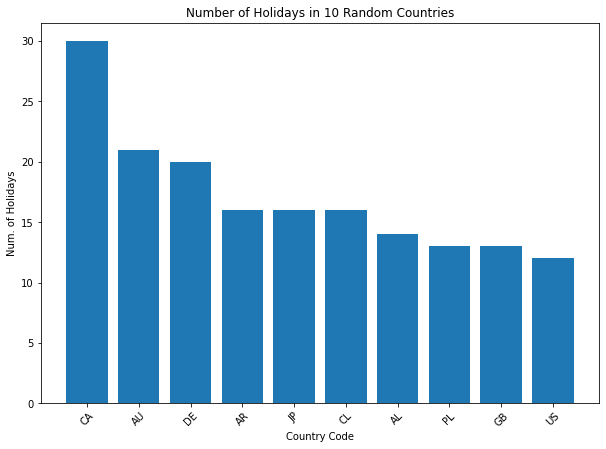

In [20]:
df = pd.DataFrame(sheet2)

day = df["Country Code"]
temp = df["Num of Holidays"]


fig = plt.figure(figsize = (10,7))
plt.bar(day[0:10], temp[0:10])

plt.xlabel("Country Code")
plt.ylabel("Num. of Holidays")
plt.title("Number of Holidays in 10 Random Countries")

#Source: https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.xticks(rotation=45)


plt.show()